In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


In [10]:
# Why did I create this? 
# I created this script due to boredam and lack of motivation to study for my stats final. 

# inputs
numValues = 70 # size of the samples in the distribution
maxValue = 80 #seems to be where the highest point of the curve is centered - mean?
runs = 10000 #simulation runs
skewness = 500 # Negative values are left skewed, positive values are right skewed.
uncle_max = []
mu = 75 # average for all non-final grades as a %
sigma = 15 # sd for all non-final grades as a %
non_final_weight = .55 # weighting for all non-final related work
final_weight = .45 # weighting for the final exam


In [11]:
#simulated runs of the distribution of the class distribution
for i in range(10000):      
    random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)  #Skewnorm function
    class_non_final = np.random.normal(mu, sigma, numValues)
    class_final_grade = final_weight * random + non_final_weight * class_non_final
    uncle_max.append(class_final_grade)






[[76.24478514 86.0964092  72.44721848 ... 83.52786717 76.09615487
  75.69444319]
 [73.5290808  96.42142545 60.823448   ... 75.85158162 69.2551696
  70.08961699]
 [70.6050381  76.57278601 82.1484921  ... 76.86800901 91.23761411
  73.07022975]
 ...
 [79.35257337 91.45638291 76.15807663 ... 70.19813325 74.06746891
  83.74798811]
 [86.81722423 85.9537861  94.79672155 ... 78.00583504 72.12283393
  85.80239713]
 [76.17694285 86.02477986 76.42389735 ... 79.06611162 62.62549855
  84.92322465]]
Enter your estimated non-final grade as a %: 200
Invalid integer. The number must be in the range of 0-100.
Enter your estimated non-final grade as a %: 99
Enter your estimated final grade as a %: 300
Invalid integer. The number must be in the range of 0-100.
Enter your estimated final grade as a %: 50
You Pass!!!!


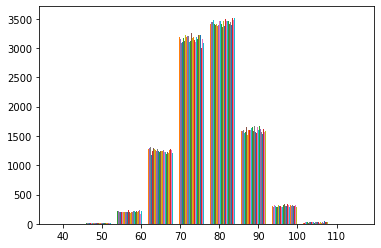

In [12]:
uncle_max_array = np.asarray(uncle_max)
uncle_max_array_2 = np.concatenate(uncle_max)    

#delete values over 100
indexArr = np.argwhere(uncle_max_array > 100)
uncle_max_array_2 = np.delete(uncle_max_array, indexArr)
print(uncle_max_array)

#failure cutoff at 2% quantile 
quantile = np.quantile(uncle_max_array_2, 0.005)

#user_non_final = int(input("Enter your estimated non-final grade as a %:"))

while True:
    try:
        user_non_final = int(input("Enter your estimated non-final grade as a %: "))
        if user_non_final < 0 or user_non_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")

while True:
    try:
        user_final = int(input("Enter your estimated final grade as a %: "))
        if user_final < 0 or user_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")
        
                
if final_weight * user_final + non_final_weight * user_non_final > quantile:
    print("You Pass!!!!")
else:
    print("You Fail! HAHAHAHAHAHA")   
          
#user_final = int(input("Enter your estimated final grade:"))



plt.hist(uncle_max_array)
plt.show()